# Introduction
### In this report, an analysis of the data from FordGoBike is performed. The goal is to discover trends and findings that will help the company perform better.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('2017-fordgobike-tripdata.csv',sep=';')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.info())


(519700, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_stat

In [5]:
# Convert start_time and end_time to date dtype to extract month
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [6]:
# Confirm that conversion has been applied
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
dtype: object

In [7]:
# Extract month from start date and end date
df['end_month'] = df['end_time'].dt.month
df['start_month'] = df['start_time'].dt.month
# extract start day
df['start_day']=df['start_time'].dt.strftime("%A")
# extract start hour
df['start_hour']=df['start_time'].dt.hour
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,end_month,start_month,start_day,start_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1,12,Sunday,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1,12,Sunday,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,1,12,Sunday,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1,12,Sunday,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1,12,Sunday,14


In [8]:
# Convert month nr. to month abbreviation
df['start_month'] = df['start_month'].apply(lambda x: calendar.month_abbr[x])


## Univariate Exploration

### In which months do the most bike rentals occur?


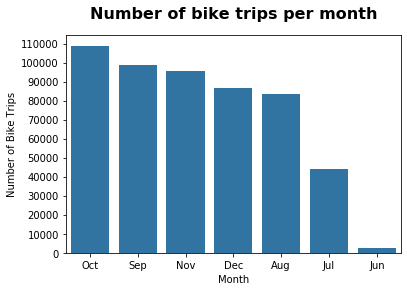

In [9]:
# Plot number of bike rentals for each month (start month) - Univariate Plot
base_color = sb.color_palette()[0]
cat_order = df['start_month'].value_counts().index
cat_order
tick_locks = np.arange(0, 175000, step=10000);
plt.yticks(tick_locks,tick_locks);
sb.countplot(data = df, x = 'start_month', color = base_color, order = cat_order);

plt.title("Number of bike trips per month", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips');

#### In the graph above, we observe that the most "busy" month in terms of number of bike trips is October followed by September and November. One other observation is that une

### In which weekday do the most bike rentals occur?

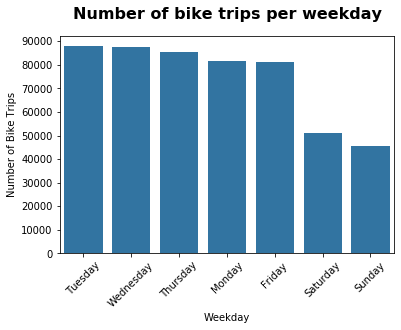

In [10]:
# Plot number of bike rentals for each weekday - Univariate Plot
# Setting the weekday order
day_order = df['start_day'].value_counts().index

tick_locks = np.arange(0, 100000, step=10000);
plt.yticks(tick_locks,tick_locks);
plt.xticks(rotation=45);
sb.countplot(data = df, x = 'start_day', color = base_color, order = day_order);

plt.title("Number of bike trips per weekday", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('Number of Bike Trips');

#### In the graph above, the number of bike trips per day of week is illustrated. We observe that there is no significant variation between weekdays (Monday - Friday) and no pattern is observed in these days. However, it is clear that the traffic over the weekend is much less with almost half bike trips occuring. For this reason, FordGoBike system may consider to implement features to increase the bike trips over the weekend, Such could be, discounts or special offers.

### What is the distribution of the trip duration ?

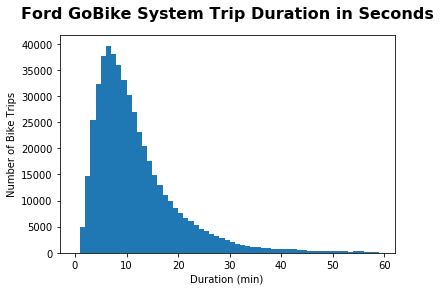

In [11]:
# Create column for trip duration in minutes
df['duration_min'] = df['duration_sec']/60
# Duration of the bike rides - in SECONDS
bin_edges_a = np.arange(0,60,1)

plt.hist(data = df, x = 'duration_min', bins = bin_edges_a);

plt.title("Ford GoBike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Bike Trips');

#### The above graph displays the distribution of the duration of bike trips. It's clear that most bike trips have a duration around 10 minutes. As the trip duration increases, the number of bike trips fall significantly. Indicatively we observe that the number of bike trips with duration around 20 minutes are 1/4 of the ones lasting 10 minutes. Finally, we can see that the graph has a long tail which shows that there are some bike trips (very few) that last almost 1 hour. However, it's safe to consider these trips as 'outliers' and ignore them.

## Bivariate Exploration

### What is the distribution of the trip duration for each month?

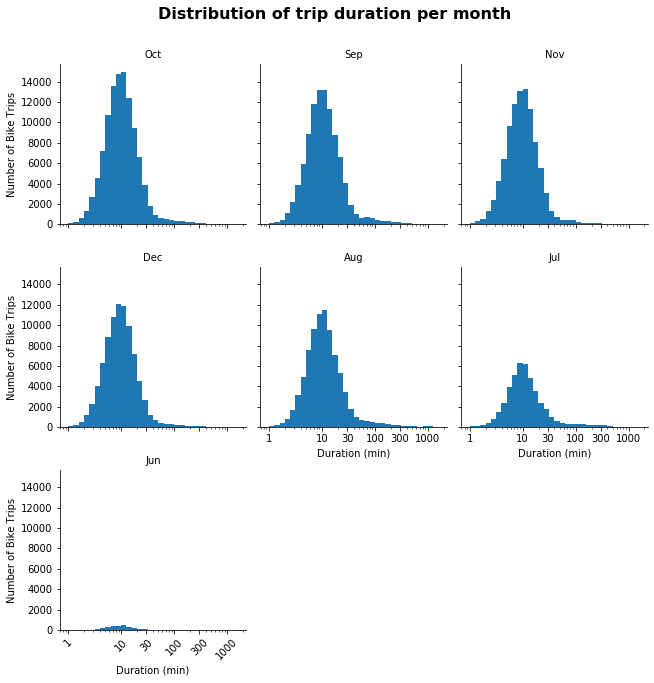

In [12]:
# Plot distribution of trip duration per month - Bivariate Plot
bin_edges = 10**np.arange(0, np.log10(df['duration_min'].max())+ 0.1, 0.1);
g = sb.FacetGrid(data = df, col = 'start_month', col_wrap =3,col_order = cat_order,height=3);
plt.xscale('log');
tick_locks = [0,1,10,30,100,300,1000,3000];
plt.xticks(tick_locks,tick_locks);
plt.xticks(rotation=45);
g.map(plt.hist, "duration_min", bins = bin_edges);

g.fig.suptitle("Distribution of trip duration per month", y=1.05, fontsize=16, fontweight='bold')

axes = g.axes.flatten()
g.set_axis_labels(x_var="Duration (min)", y_var="Number of Bike Trips");
g.set_titles('{col_name}');

#### In the above graph, we see the distribution of trip duration for each month. By observing the graphs, we notice that the distribution for each month is almost identical. All months have a peak in bike trips lasting around 10 minutes and in all months there are bike trips that are very long and can be considered as outliers. The only variation that we observe from month to month is the absolute number of bike trips.

### What is the proportion of "Customer" user type and "Subscriber"?

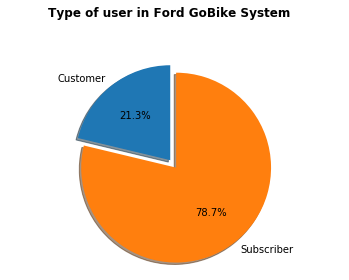

In [13]:
customer_ratio = len(df.query('user_type == "Customer"'))/len(df)
subscriber_ratio = len(df.query('user_type == "Subscriber"'))/len(df)

labels = 'Customer', 'Subscriber'
sizes = [customer_ratio,subscriber_ratio];
explode = (0.1,0) ; # only "explode" the 1st slice 

fig1, ax1 = plt.subplots();
ax1.pie(sizes, explode=explode, labels=labels,shadow=True, startangle=90,autopct='%1.1f%%');
ax1.axis('equal') ; # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Type of user in Ford GoBike System', y=1.05, fontsize=12, fontweight='bold');

#### After the findings in the univariate analysis, we would like to observe differences between the user types of the FordGoBike system. The pie above illustrates the proportion of "Customer" and "Subscriber" user type, with the latter being dominant with 78.7% of all users while the "Customer" gets only 21.3%

### What is the average trip duration for each user type?

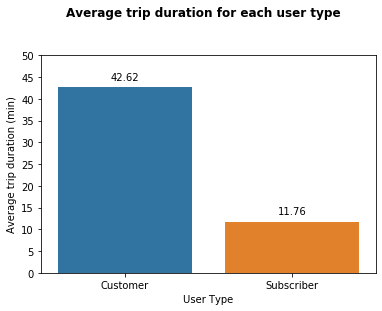

In [14]:
df_user_type = df.groupby(['user_type'],as_index=False)['duration_min'].mean()
df_user_type

ax = sb.barplot(data=df_user_type,x="user_type", y="duration_min",ci = None)
tick_locks = np.arange(0,55,5);
plt.yticks(tick_locks,tick_locks);
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
            va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.suptitle('Average trip duration for each user type', y=1.05, fontsize=12, fontweight='bold');
plt.xlabel('User Type')
plt.ylabel('Average trip duration (min)');

#### The graph above shows the average trip duration that each user type is doing. It's interesting that the "Subscriber" user type is in accordance with the findings in the 1st section while the "Customer" user type is having much longer rides, 42.62 minutes on average. The fact that the "Subscriber" type is dominating the users results in having an overall peak trip duration around 10 minutes, the finding in the univariate analysis.

## Multivariate Exploration

In [15]:
df_small = df.groupby(['user_type','start_month'],as_index = False).duration_min.mean()
df_small

,user_type,start_month,duration_min
0,Customer,Aug,44.538246
1,Customer,Dec,39.006548
2,Customer,Jul,56.148545
3,Customer,Jun,51.358778
4,Customer,Nov,38.328855
5,Customer,Oct,39.063907
6,Customer,Sep,41.350159
7,Subscriber,Aug,12.291582
8,Subscriber,Dec,11.407327
9,Subscriber,Jul,12.395492


### What is the trip duration for each user type per month?

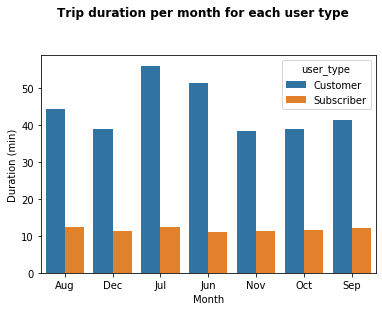

In [16]:
sb.barplot(data=df_small, x='start_month', y='duration_min',hue='user_type',dodge=0.3);
plt.suptitle("Trip duration per month for each user type",y=1.05, fontsize=12, fontweight='bold');
plt.xlabel('Month');
plt.ylabel('Duration (min)');

#### The above graph shows the trip duration per month for each user type. As the previous graph revealed differences between the trip duration that each user type is doing, I would like to see if the same applies from month to month. This could help FordGoBike system provide extra incentives to specific months for each user type. However, by observing the graph, one concludes that no big differences occur between month to month for both user types.

### What are the most often weekdays and time of day each user type uses the FordGoBike system?

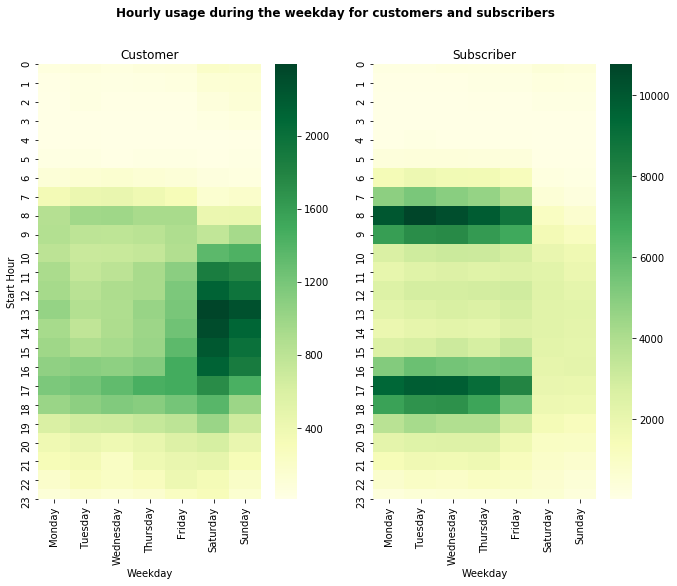

In [18]:
# Order weekdays
df['start_day'] = pd.Categorical(df['start_day'], 
                                 categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], 
                                                ordered=True)

plt.figure(figsize=(11,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=12, fontweight='semibold')
plt.subplot(1, 2, 1)

# Create plot for customer
df_customer = df.query('user_type == "Customer"').groupby(["start_hour", "start_day"])["bike_id"].size()
df_customer = df_customer.reset_index()
df_customer = df_customer.pivot("start_hour", "start_day","bike_id")
sb.heatmap(df_customer,cmap="YlGn");

plt.title("Customer")
plt.xlabel('Weekday')
plt.ylabel('Start Hour')

# Create plot for subscriber
plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_hour", "start_day", "bike_id")
sb.heatmap(df_subscriber, cmap="YlGn")

plt.title("Subscriber")
plt.xlabel('Weekday')
plt.ylabel('');

#### The final graph of my analysis displays the hourly usage of the FordGoBike system during the weekdays for each user type. The "Customer" type seems that makes use of the system mostly over the weekend with peak hours between 11 - 17. Low usage is observed for the rest of the week. On the other hand, the "Subscriber" type uses the system almost only during the weekdays (Mon - Fri) between hours 7-9 and 16 - 18. We concude that the users of the system have totally different habits and therefore marketing should act according to the findings of this analysis